In [ ]:
import pandas as pd

# 读取原始文件路径
file_path = 'SGO-2021-01_Incident_Reports_ADS .csv'
data = pd.read_csv(file_path)

# 保留的列
columns_to_keep = [
    'Make', 'Model', 'Model Year', 'Mileage',
    'ADAS/ADS System Version', 'ADAS/ADS Hardware Version', 'ADAS/ADS Software Version',
    'Roadway Type', 'Roadway Surface', 'Roadway Description', 'Lighting',
    'Weather - Clear', 'Weather - Snow', 'Weather - Cloudy', 'Weather - Fog/Smoke',
    'Weather - Rain', 'Weather - Severe Wind', 'Weather - Unknown',
    'Weather - Other', 'Weather - Other Text', 'Highest Injury Severity Alleged'
]

# 过滤指定列
filtered_data = data[columns_to_keep]

# 保存为新文件

filtered_data.to_csv('filtered_SGO_Incident_Reports.csv', index=False, encoding='utf-8')


In [4]:
import pandas as pd

# 请将文件路径替换为您下载的文件路径
filtered_file_path = 'filtered_SGO_Incident_Reports.csv'  # 替换为您的文件路径
data = pd.read_csv(filtered_file_path)

# 定义天气属性列及其对应的标签
weather_columns = [
    'Weather - Clear', 'Weather - Snow', 'Weather - Cloudy', 'Weather - Fog/Smoke',
    'Weather - Rain', 'Weather - Severe Wind', 'Weather - Unknown', 'Weather - Other'
]
weather_labels = {col: i for i, col in enumerate(weather_columns)}

# 将天气列转换为布尔值：将 "Y" 转换为 1，其他转换为 0
for col in weather_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Y' else 0)

# 创建新的 'weather' 列，用标签表示不同的天气类型
data['weather'] = data[weather_columns].idxmax(axis=1).map(weather_labels).fillna(-1).astype(int)

# 删除原有的天气属性列
data = data.drop(columns=weather_columns + ['Weather - Other Text'])

# 保存修改后的文件
output_path = 'filtered_SGO_Incident_Reports_with_weather_labels.csv'
data.to_csv(output_path, index=False, encoding='utf-8')



NameError: name 'columns_to_keep' is not defined

In [5]:
import pandas as pd

# 请将文件路径替换为您下载的文件路径
file_path = 'filtered_SGO_Incident_Reports_with_weather_labels.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

# 检查 'Highest Injury Severity Alleged' 列中的唯一值
unique_injury_severity = data['Highest Injury Severity Alleged'].unique()
print("Highest Injury Severity Alleged 中的唯一情况有：")
for severity in unique_injury_severity:
    print(severity)


Highest Injury Severity Alleged 中的唯一情况有：
Moderate
No Injuries Reported
Minor
Unknown
Serious
Fatality
nan


In [6]:
import pandas as pd

# 请将文件路径替换为您下载的文件路径
file_path = 'filtered_SGO_Incident_Reports_with_weather_labels.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

# 删除 'Highest Injury Severity Alleged' 列中为 NaN 或 'Unknown' 的行
data = data.dropna(subset=['Highest Injury Severity Alleged'])
data = data[data['Highest Injury Severity Alleged'] != 'Unknown']

# 定义伤害严重程度的映射
severity_mapping = {
    'No Injuries Reported': 1,
    'Minor': 2,
    'Moderate': 3,
    'Serious': 4,
    'Fatality': 4
}
data['Highest Injury Severity Alleged'] = data['Highest Injury Severity Alleged'].map(severity_mapping)

# 保存修改后的文件
output_path = 'filtered_SGO_Incident_Reports_with_injury_labels.csv'
data.to_csv(output_path, index=False, encoding='utf-8')



In [11]:
import pandas as pd
import csv

# 请将文件路径替换为您下载的文件路径
file_path = 'filtered_SGO_Incident_Reports_with_injury_labels.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

# 需要处理的列（不包含 'Mileage'）
columns_to_label = [
    'Make', 'Model', 'Model Year',
    'ADAS/ADS System Version', 'ADAS/ADS Hardware Version', 'ADAS/ADS Software Version',
    'Roadway Type', 'Roadway Surface', 'Roadway Description', 'Lighting'
]

# 存储每个列的唯一值和标签
unique_values_labels = {}

# 为每个指定列生成标签
for col in columns_to_label:
    unique_values = data[col].unique()
    labels = {val: idx for idx, val in enumerate(unique_values)}
    unique_values_labels[col] = labels
    # 将列值替换为相应的标签
    data[col] = data[col].map(labels)

# 保存标注后的数据到新的CSV文件
labeled_data_path = 'labeled_SGO_Incident_Reports_excluding_mileage.csv'
data.to_csv(labeled_data_path, index=False, encoding='utf-8')
print(f"标注后的数据已保存到: {labeled_data_path}")

# 定义查找表的文件路径
lookup_table_path = 'lookup_table.csv'

# 准备数据以写入查找表
lookup_data = []
for col, labels in unique_values_labels.items():
    for val, label in labels.items():
        lookup_data.append([col, val, label])

# 将查找表写入 CSV 文件
with open(lookup_table_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Column', 'Value', 'Label'])
    writer.writerows(lookup_data)

print(f"查找表已保存到: {lookup_table_path}")


标注后的数据已保存到: labeled_SGO_Incident_Reports_excluding_mileage.csv
查找表已保存到: lookup_table.csv


E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

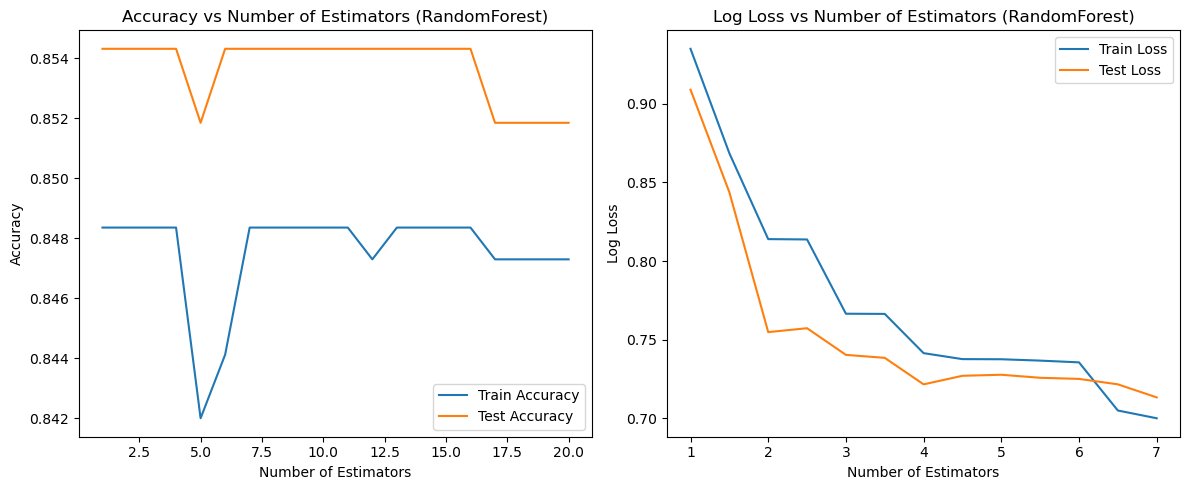

<Figure size 640x480 with 0 Axes>

图像已保存至文件夹: test_15


In [7]:
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# 请将文件路径替换为您下载的文件路径
file_path = 'labeled_SGO_Incident_Reports_excluding_mileage.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

# 使用最频繁值填充
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 将 "Highest Injury Severity Alleged" 作为目标变量 y，其他列作为特征 X
X = data_imputed.drop(columns=['Highest Injury Severity Alleged'])
y = data_imputed['Highest Injury Severity Alleged']

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化列表以存储每次迭代的准确率和损失
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# 迭代训练模型
for max_iter in range(10, 201, 10):
    model = LogisticRegression(max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    
    # 预测
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 计算准确率和损失
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    # 将结果添加到列表中
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# 自动生成文件夹名称
base_folder = "test_"
folder_index = 0
while os.path.exists(f"{base_folder}{folder_index}"):
    folder_index += 1
folder_name = f"{base_folder}{folder_index}"
os.makedirs(folder_name)

# 绘制准确率和损失曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10, 201, 10), train_accuracies, label="Train Accuracy")
plt.plot(range(10, 201, 10), test_accuracies, label="Test Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(10, 201, 10), train_losses, label="Train Loss")
plt.plot(range(10, 201, 10), test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Iterations")
plt.legend()

plt.tight_layout()

# 保存图像到生成的文件夹中
plt.savefig(f"{folder_name}/accuracy_loss_plot.png")
plt.show()

print(f"图像已保存至文件夹: {folder_name}")


<Figure size 1200x500 with 0 Axes>

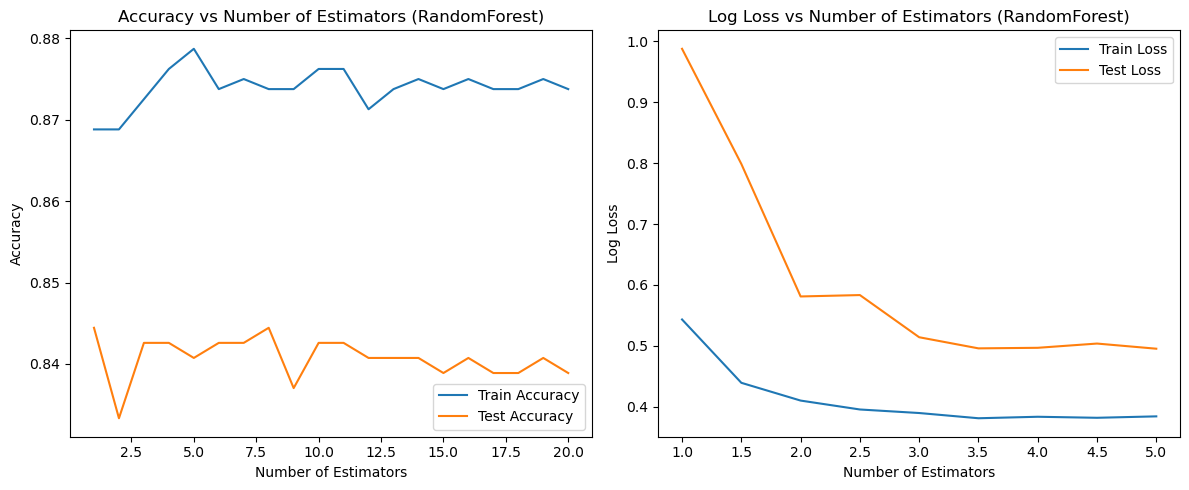

<Figure size 640x480 with 0 Axes>

图像已保存至文件夹: test_0


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
# 请将文件路径替换为您下载的文件路径
file_path = 'labeled_SGO_Incident_Reports_excluding_mileage.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)


data = shuffle(data, random_state=42)

# 使用最频繁值填充
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 将 "Highest Injury Severity Alleged" 作为目标变量 y，其他列作为特征 X
X = data_imputed.drop(columns=['Highest Injury Severity Alleged'])
y = data_imputed['Highest Injury Severity Alleged']

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 初始化列表以存储每次迭代的准确率和损失
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

# 使用不同的n_estimators（树的数量）训练随机森林模型，以观察准确率和损失的变化
for n_estimators in range(1, 21, 1):  # 从10到200，每次增加10
    model = RandomForestClassifier(n_estimators=10, max_depth=3, max_leaf_nodes=10, random_state=42)
    model.fit(X_train, y_train)
        
       
    # 预测
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 计算准确率和损失
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    # 将结果添加到列表中
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# 自动生成文件夹名称
base_folder = "test_"
folder_index = 0
while os.path.exists(f"{base_folder}{folder_index}"):
    folder_index += 1
folder_name = f"{base_folder}{folder_index}"
os.makedirs(folder_name)

# 绘制准确率和损失曲线
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 第一张子图，准确率
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), train_accuracies, label="Train Accuracy")
plt.plot(range(1, 21), test_accuracies, label="Test Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Estimators (RandomForest)")
plt.legend()

# 第二张子图，损失函数，仅展示到7棵树
plt.subplot(1, 2, 2)
x_values = np.arange(1, 5.5, 0.5)  # 从1到7，步长为0.5
plt.plot(x_values, train_losses[:len(x_values)], label="Train Loss")
plt.plot(x_values, test_losses[:len(x_values)], label="Test Loss")
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Number of Estimators (RandomForest)")
plt.legend()

plt.tight_layout()
plt.show()


# 保存图像到生成的文件夹中
plt.savefig(f"{folder_name}/accuracy_loss_plot_rf.png")
plt.show()

print(f"图像已保存至文件夹: {folder_name}")



In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# 请将文件路径替换为您的文件路径
file_path = 'labeled_SGO_Incident_Reports_excluding_mileage.csv'  # 替换为您的文件路径
data = pd.read_csv(file_path)

# 数据打乱
data = shuffle(data, random_state=42)

# 使用最频繁值填充
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 将 "Highest Injury Severity Alleged" 作为目标变量 y，其他列作为特征 X
X = data_imputed.drop(columns=['Highest Injury Severity Alleged'])
y = data_imputed['Highest Injury Severity Alleged'] - 1  # 将标签从1-4转为0-3

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 转换为Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # 多分类任务需要long类型
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 创建数据加载器
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# 定义神经网络模型
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # 不使用softmax，因为CrossEntropyLoss会自动计算
        return x

# 初始化模型、损失函数和优化器
input_size = X_train.shape[1]
num_classes = len(np.unique(y))  # 类别数量
model = NeuralNet(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # 多分类任务，使用交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型并记录准确率和损失
n_epochs = 50
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(n_epochs):
    model.train()
    train_loss, correct_train = 0.0, 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == y_batch).sum().item()
        
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(correct_train / len(y_train))

    # 测试模型
    model.eval()
    test_loss, correct_test = 0.0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == y_batch).sum().item()
    
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct_test / len(y_test))

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracies[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")

# 自动生成文件夹名称
base_folder = "test_"
folder_index = 0
while os.path.exists(f"{base_folder}{folder_index}"):
    folder_index += 1
folder_name = f"{base_folder}{folder_index}"
os.makedirs(folder_name)

# 绘制训练和测试集的准确率和损失变化曲线
plt.figure(figsize=(14, 6))

# 准确率曲线
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label="Train Accuracy", color="blue")
plt.plot(test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs (Neural Network)")
plt.legend()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Neural Network)")
plt.legend()

# 保存图像到生成的文件夹中
plt.tight_layout()
plt.savefig(f"{folder_name}/accuracy_loss_vs_epochs_nn.png")
plt.show()

print(f"图像已保存至文件夹: {folder_name}")


ModuleNotFoundError: No module named 'torch'